Dataset Shape: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64


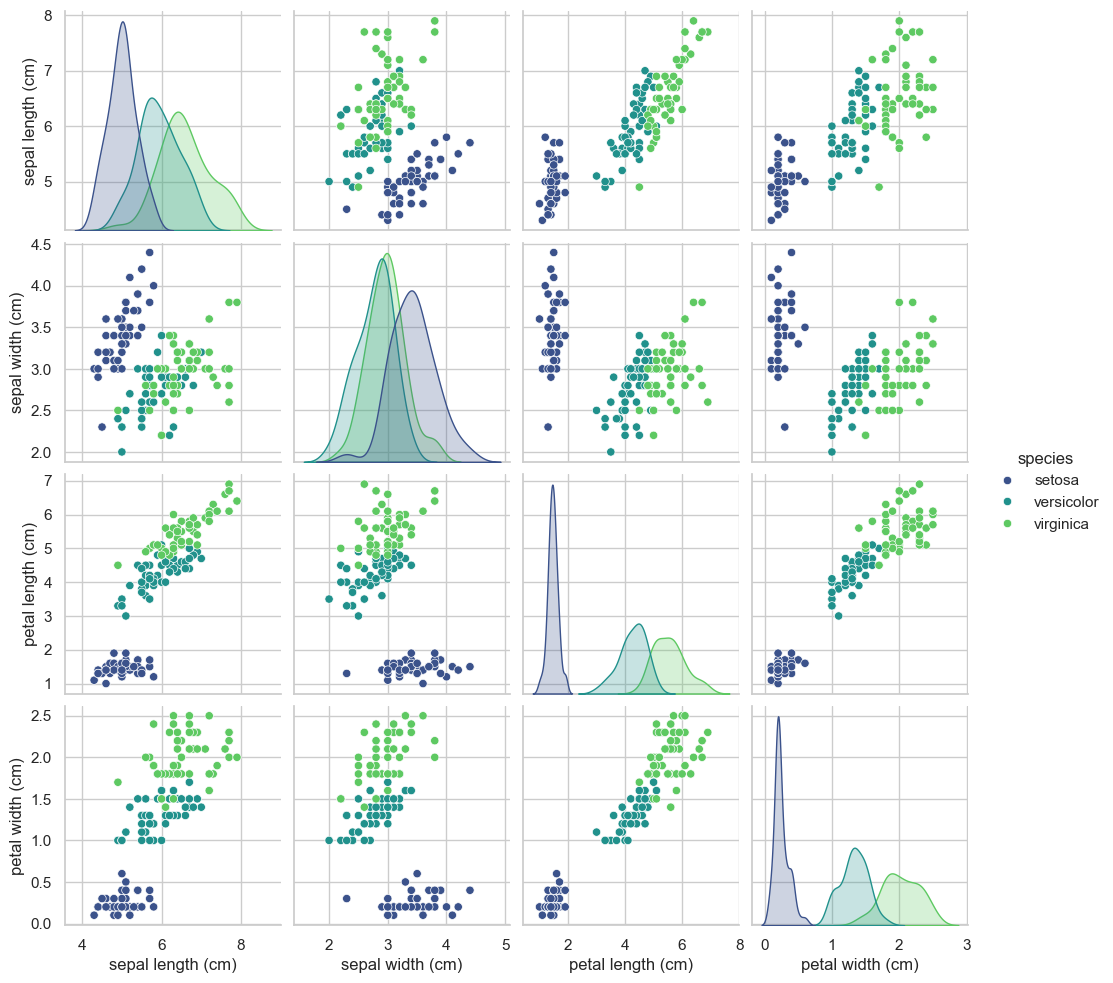

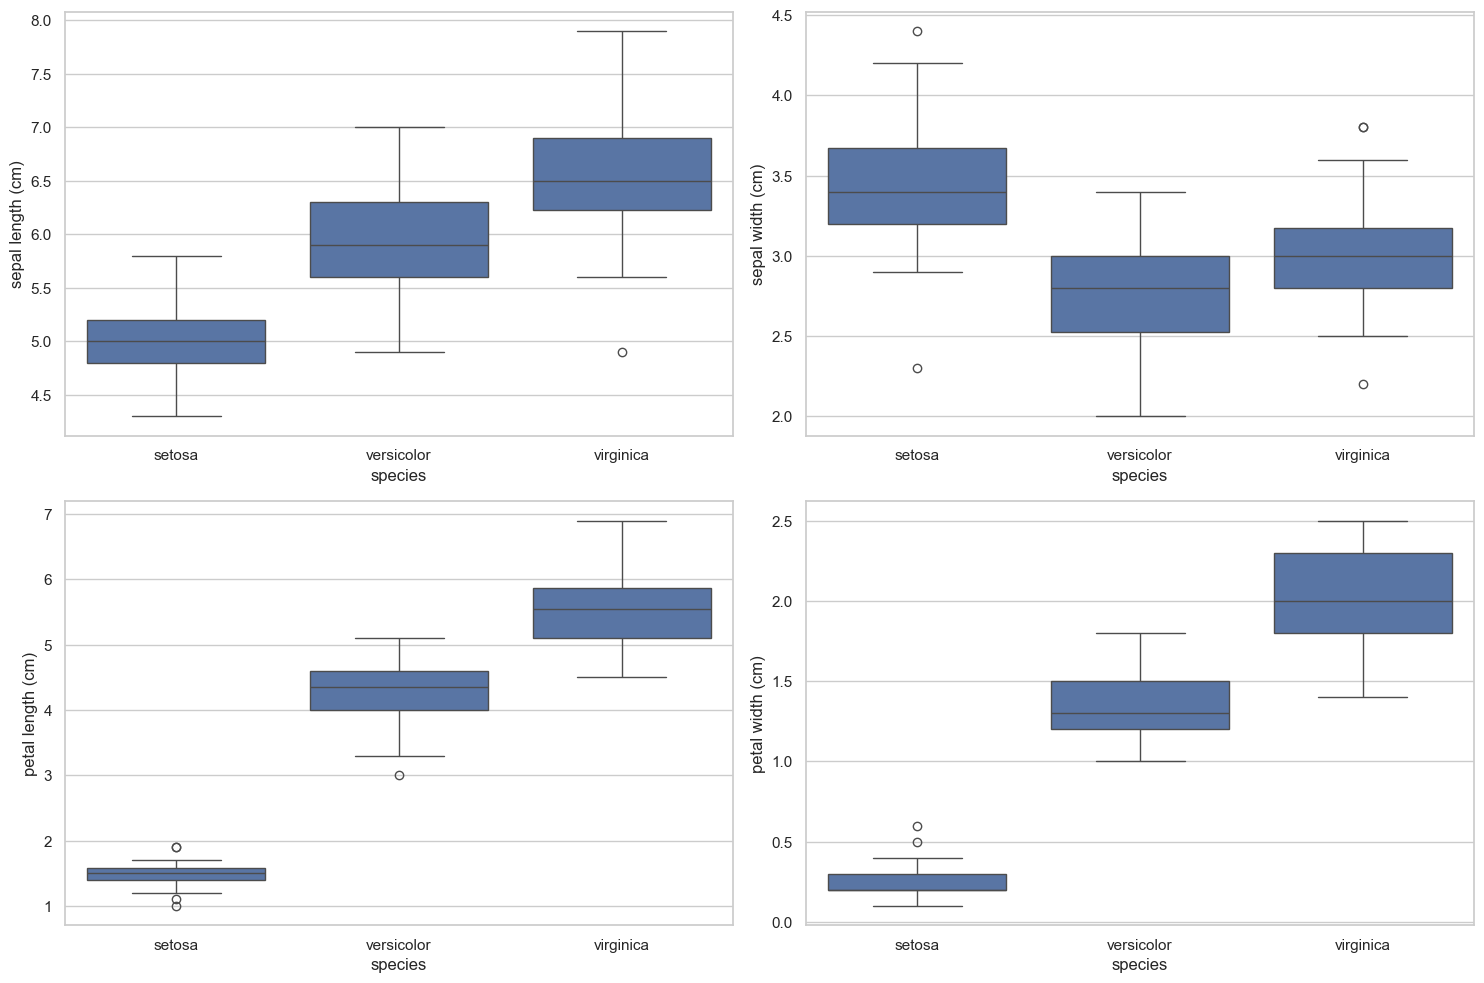

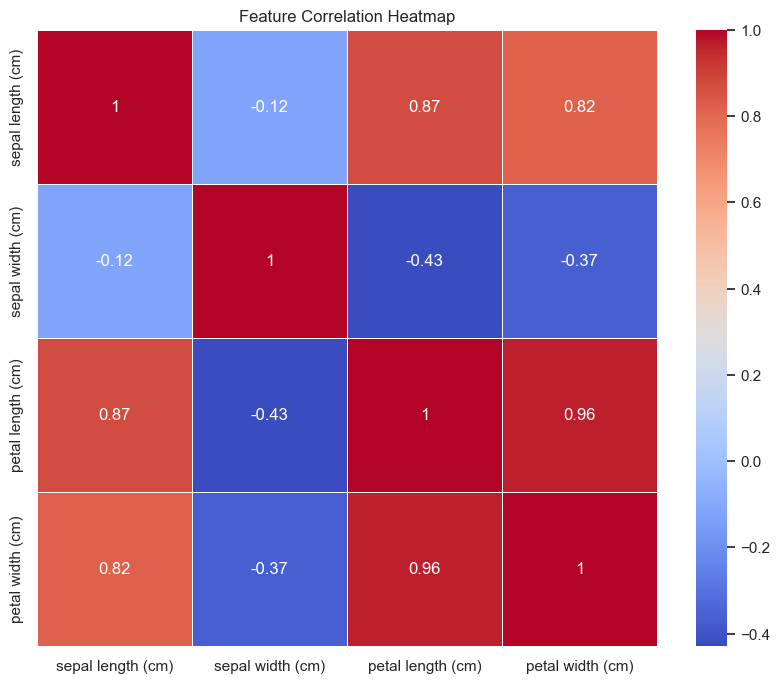

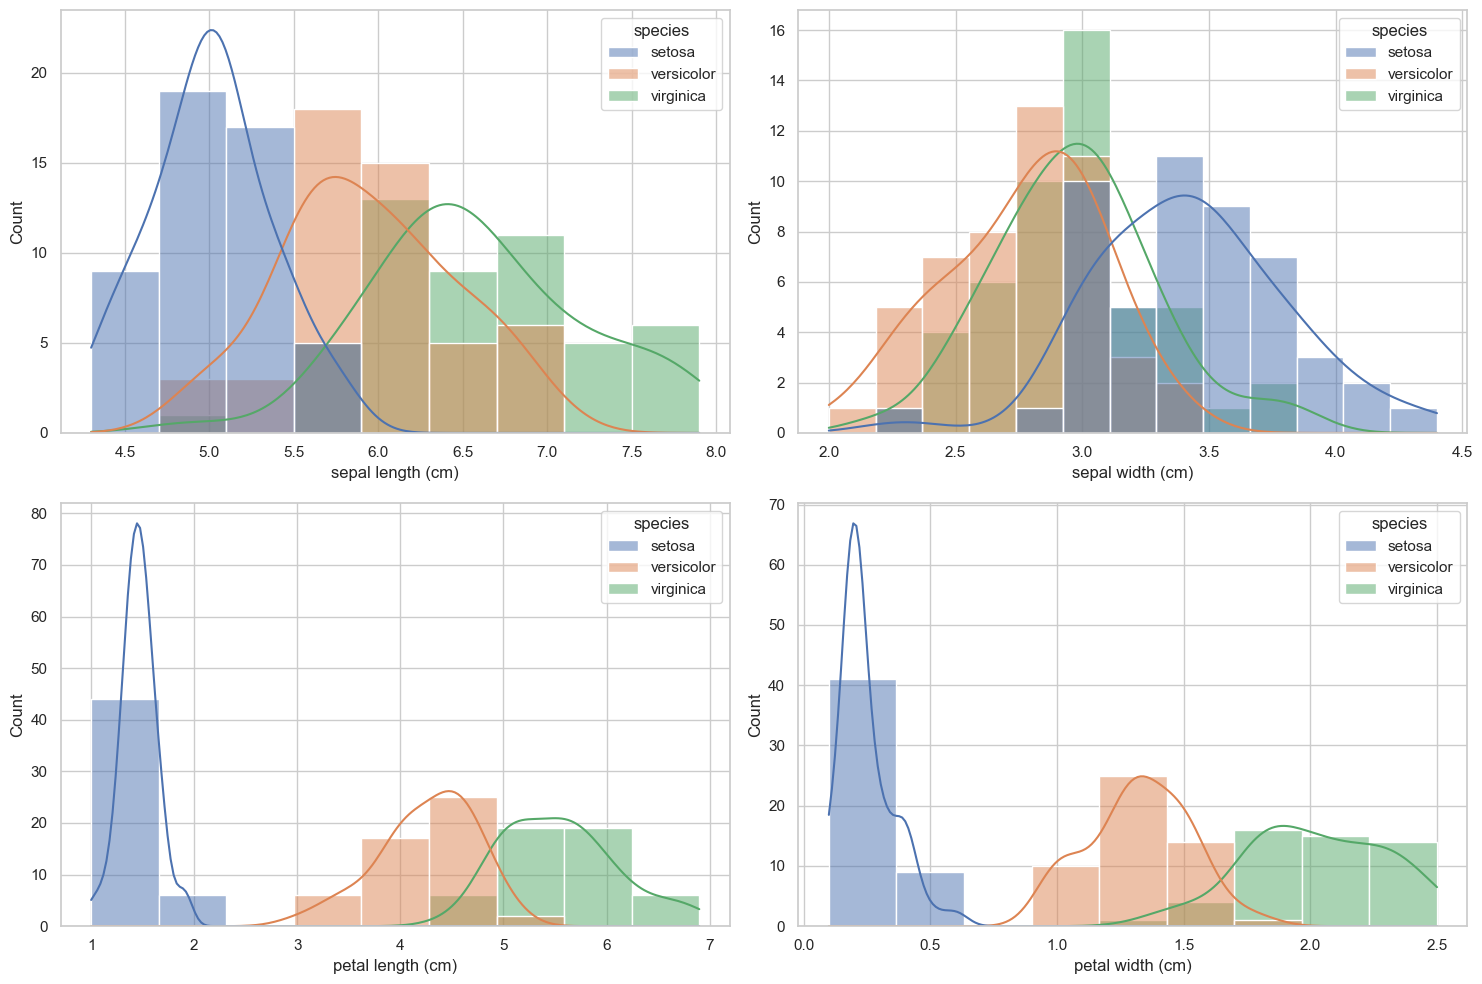


Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Training set size: 120
Testing set size: 30

K-Nearest Neighbors Results:
Accuracy: 0.9333
Cross-validation Mean: 0.9667 (+/- 0.0624)

Decision Tree Results:
Accuracy: 0.9333
Cross-validation Mean: 0.9417 (+/- 0.0408)

Random Forest Results:
Accuracy: 0.9000
Cross-validation Mean: 0.9500 (+/- 0.0333)

Support Vector Machine Results:
Accuracy: 0.9667
Cross-validation Mean: 0.9667 (+/- 0.0624)

Logistic Regression Results:
Accuracy: 0.9333
Cross-validation Mean: 0.9583 (+/- 0.0527)

Best Model: Support Vector Machine with accuracy: 0.9667

Detailed Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy      

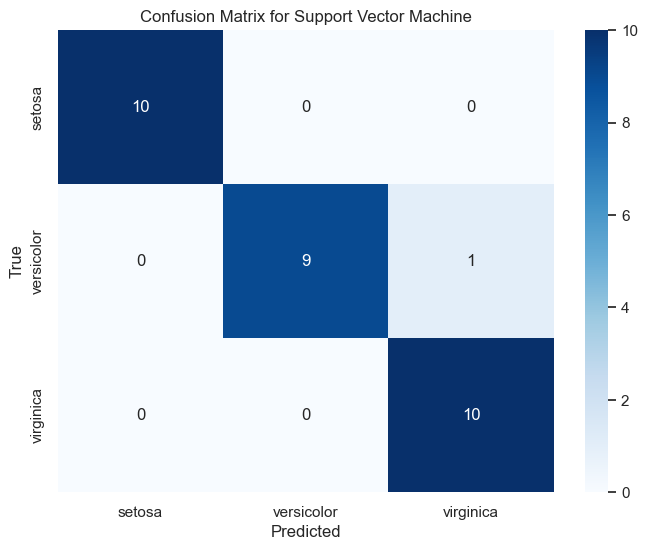

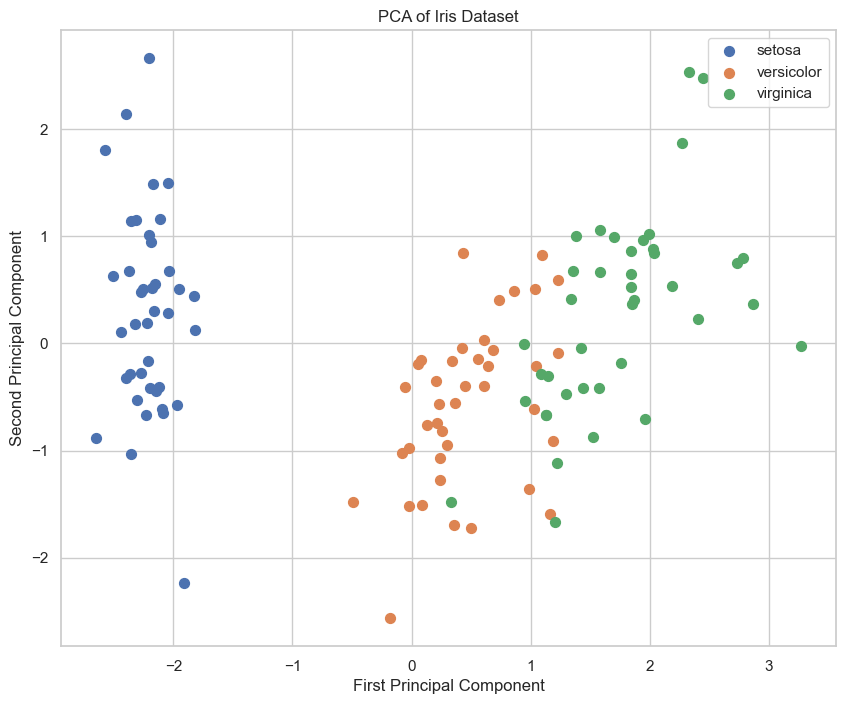

Explained variance ratio: [0.72677234 0.23066667]
Total explained variance: 0.9574

Final Model Accuracy on Test Set: 0.9667

Final Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Example Predictions:
Example 1: [5.1, 3.5, 1.4, 0.2] -> Predicted: setosa
Probabilities: {'setosa': 0.9720988566091773, 'versicolor': 0.015973986085471913, 'virginica': 0.011927157305350993}

Example 2: [6.0, 2.7, 5.1, 1.6] -> Predicted: virginica
Probabilities: {'setosa': 0.009741007860949032, 'versicolor': 0.3590799127796701, 'virginica': 0.6311790793593812}

Example 3: [7.7, 3.0, 6.1, 2.3] -> Predicted: virginica
Probabilities: {'setosa': 0.013740991195232

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 8)

# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nSpecies Count:")
print(df['species'].value_counts())

# Data Exploration and Visualization
# 1. Pairplot to see relationships between features
print("\nPairplot of the dataset:")
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

# 2. Boxplots to see distribution of features by species
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='species', y='sepal length (cm)', data=df, ax=axes[0, 0])
sns.boxplot(x='species', y='sepal width (cm)', data=df, ax=axes[0, 1])
sns.boxplot(x='species', y='petal length (cm)', data=df, ax=axes[1, 0])
sns.boxplot(x='species', y='petal width (cm)', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.iloc[:, :-1].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 4. Distribution plots for each feature by species
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='sepal length (cm)', hue='species', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='sepal width (cm)', hue='species', kde=True, ax=axes[0, 1])
sns.histplot(data=df, x='petal length (cm)', hue='species', kde=True, ax=axes[1, 0])
sns.histplot(data=df, x='petal width (cm)', hue='species', kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Data Preprocessing
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Prepare data for modeling
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Model Selection and Training
# Initialize models (with probability=True for SVC)
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),  # Fixed: added probability=True
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Find the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['accuracy']:.4f}")

# Detailed evaluation of the best model
y_pred = best_model.predict(X_test_scaled)
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

# Hyperparameter Tuning (for the best model)
if best_model_name == 'K-Nearest Neighbors':
    # Tune KNN
    k_values = list(range(1, 21))
    accuracies = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy for Different K Values')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()
    
    best_k = k_values[accuracies.index(max(accuracies))]
    print(f"Best K value: {best_k} with accuracy: {max(accuracies):.4f}")
    
    # Update best model with tuned parameters
    best_model = KNeighborsClassifier(n_neighbors=best_k)
    best_model.fit(X_train_scaled, y_train)

# Model Interpretation
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()
elif hasattr(best_model, 'coef_'):
    # For linear models
    if len(best_model.coef_) > 1:  # For multiclass classification
        coef_df = pd.DataFrame(best_model.coef_.T, 
                              columns=iris.target_names, 
                              index=X.columns)
        plt.figure(figsize=(10, 6))
        sns.heatmap(coef_df, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Coefficients for Each Class')
        plt.show()
    else:
        # For binary classification
        coef_df = pd.DataFrame({
            'feature': X.columns,
            'coefficient': best_model.coef_[0]
        }).sort_values('coefficient', key=abs, ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='coefficient', y='feature', data=coef_df)
        plt.title('Feature Coefficients')
        plt.show()

# Dimensionality Reduction and Visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
for species in df['species'].unique():
    indices = y_train == species
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=species, s=50)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Final Model Evaluation on Test Set
final_predictions = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"\nFinal Model Accuracy on Test Set: {final_accuracy:.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, final_predictions))

# Create a simple prediction function
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    # Create a dataframe with the input values
    input_data = pd.DataFrame({
        'sepal length (cm)': [sepal_length],
        'sepal width (cm)': [sepal_width],
        'petal length (cm)': [petal_length],
        'petal width (cm)': [petal_width]
    })
    
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = best_model.predict(input_scaled)
    
    # Get probabilities if the model supports it
    if hasattr(best_model, 'predict_proba'):
        probability = best_model.predict_proba(input_scaled)
    else:
        # For models that don't support predict_proba, return None for probabilities
        probability = None
    
    return prediction[0], probability[0] if probability is not None else None

# Test the prediction function with some example values
example_measurements = [
    [5.1, 3.5, 1.4, 0.2],  # setosa
    [6.0, 2.7, 5.1, 1.6],  # versicolor
    [7.7, 3.0, 6.1, 2.3]   # virginica
]

print("\nExample Predictions:")
for i, measurement in enumerate(example_measurements):
    species, probabilities = predict_iris(*measurement)
    print(f"Example {i+1}: {measurement} -> Predicted: {species}")
    if probabilities is not None:
        print(f"Probabilities: {dict(zip(iris.target_names, probabilities))}")
    else:
        print("Probability scores not available for this model")
    print()